Analysis of temperature data at station 'ACME'

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Temperature at surface at station 'ACME: ts'
ts = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp_sfc\\ts_station.csv", header=None)
# Temperature 2m above surface at station 'ACME: t'
t = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp\\t_station.csv", header=None)
# minimum temperature 2m above surface at station 'ACME: mint'
mint = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Min_temp\\mint_station.csv", header=None)
# maximum temperature 2m above surface at station 'ACME: maxt'
maxt = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Max_temp\\maxt_station.csv", header=None)


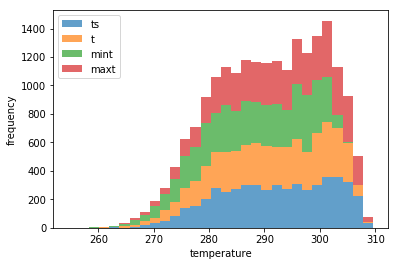

Standard deviation:
surface t: 9.730361498933222 , t: 9.71734406857828 , minimum t: 9.355778556111733 , maximum t: 9.653834412379034
Arithmatic mean:
surface t: 291.94387788871524 , t: 290.94114021670214 , minimum t: 288.05022534382925 , maximum t: 292.11333075493917


In [4]:
# Histograms of all the flux to see frequency distribution from 14 years of data

plt.hist([ts[0],t[0], mint[0], maxt[0]], bins=30, stacked=True, alpha=0.7, label=['ts', 't', 'mint', 'maxt'])
plt.legend()
plt.ylabel('frequency')
plt.xlabel('temperature')
plt.show()

# standard deviation of temperature:
print('Standard deviation:')
print('surface t:', ts.stack().std(), ', t:', t.stack().std(), ', minimum t:', mint.stack().std(), ', maximum t:', maxt.stack().std())
# Arithmatic mean of radiative flux:
print('Arithmatic mean:')
print('surface t:', ts[0].mean(), ', t:', t[0].mean(), ', minimum t:', mint[0].mean(), ', maximum t:', maxt[0].mean())


the distribution is similar to all temperature variables

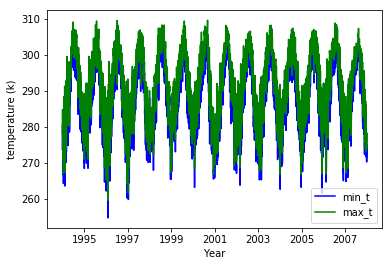

In [10]:
dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))
dates[:365]
# plot time series of temperature
#plt.plot(dates, ts, color='orange' , label='t_sfc')
#plt.plot(dates, t, color='gray', label='t')
plt.plot(dates, mint, color='blue', label='min_t')
plt.plot(dates, maxt, color='green', label='max_t')
plt.xlabel('Year')
plt.ylabel('temperature (k)')
#plt.ylim(300, 1000)
plt.legend(loc='lower right')
plt.show()


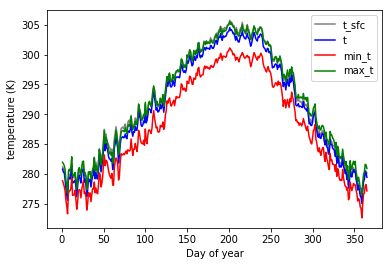

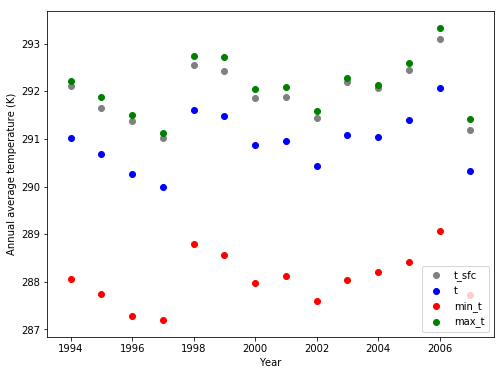

In [11]:
# for all radiative type
file = [ts, t, mint, maxt]
avg_t = pd.DataFrame()
annual_t = pd.DataFrame()
for j in range(4):
    temp = file[j]
    #Averaging temp over each day in the year: avg_t
    # Annual average of temp: annual_t
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = temp[:365]

    for i in range(2007 - 1994):
        #print(d[i], d[i+1])
        yr1 = temp[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    annual_avg = yr.mean(axis=0)
    #print(type(avg_yr))
    avg_t = pd.concat([avg_t, avg_yr], axis=1)
    annual_t = pd.concat([annual_t, annual_avg], axis=1)
avg_t.columns = ['ts', 't', 'mint', 'maxt']
annual_t.columns = ['ts', 't', 'mint', 'maxt']
#print(annual_rf)

days = list(range(1, 366))

plt.plot(days, avg_t['ts'], color='gray', label='t_sfc')
plt.plot(days, avg_t['t'], color='blue', label='t')
plt.plot(days, avg_t['mint'], color='red', label='min_t')
plt.plot(days, avg_t['maxt'], color='green', label='max_t')

plt.xlabel('Day of year')
plt.ylabel('temperature (K)')
plt.legend(loc='upper right')
#plt.figure(figsize=(3,4))
plt.rcParams["figure.figsize"] = [8,6]
plt.show()

# Any trend in annual average values?? Not apperant from the plot
year = list(range(1994, 2008))
plt.scatter(year, annual_t['ts'], color='gray', label='t_sfc')
plt.scatter(year, annual_t['t'], color='blue', label='t')
plt.scatter(year, annual_t['mint'], color='red', label='min_t')
plt.scatter(year, annual_t['maxt'], color='green', label='max_t')

plt.xlabel('Year')
plt.ylabel('Annual average temperature (K)')
plt.legend(loc='lower right')
plt.show()


Temperature at surface is higher than the temperature above the surface.
As expected, the temperature during summer is higher than in winter. The seasonality is pretty strong.
The temperature trend is not so obvious from this short span.

            ts         t      mint      maxt
ts    1.000000  0.999189  0.997885  0.998523
t     0.999189  1.000000  0.999258  0.999726
mint  0.997885  0.999258  1.000000  0.999225
maxt  0.998523  0.999726  0.999225  1.000000


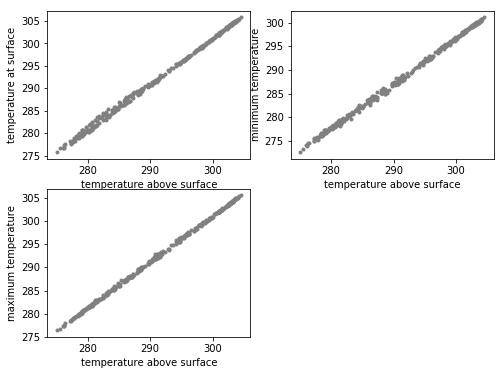

In [19]:
print(avg_t.corr())
fig = plt.figure()
plt.subplot(2,2,1)
plt.scatter(avg_t['t'], avg_t['ts'], color='gray', marker='.')
plt.xlabel('temperature above surface')
plt.ylabel('temperature at surface')

plt.subplot(2,2,2)
plt.scatter(avg_t['t'], avg_t['mint'], color='gray', marker='.')
plt.xlabel('temperature above surface')
plt.ylabel('minimum temperature')

plt.subplot(2,2,3)
plt.scatter(avg_t['t'], avg_t['maxt'], color='gray', marker='.')
plt.xlabel('temperature above surface')
plt.ylabel('maximum temperature')


plt.show()

The strong linear correlation among all temperature variables suggest that instead of using all of them, we can use one temperature measure (e.g., temperature above surface, t) as input for solar energy forecasting.